In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/datasets/Raotbl6.csv'

df = pd.read_csv(file_path , parse_dates=["date"] , index_col="date")
df.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


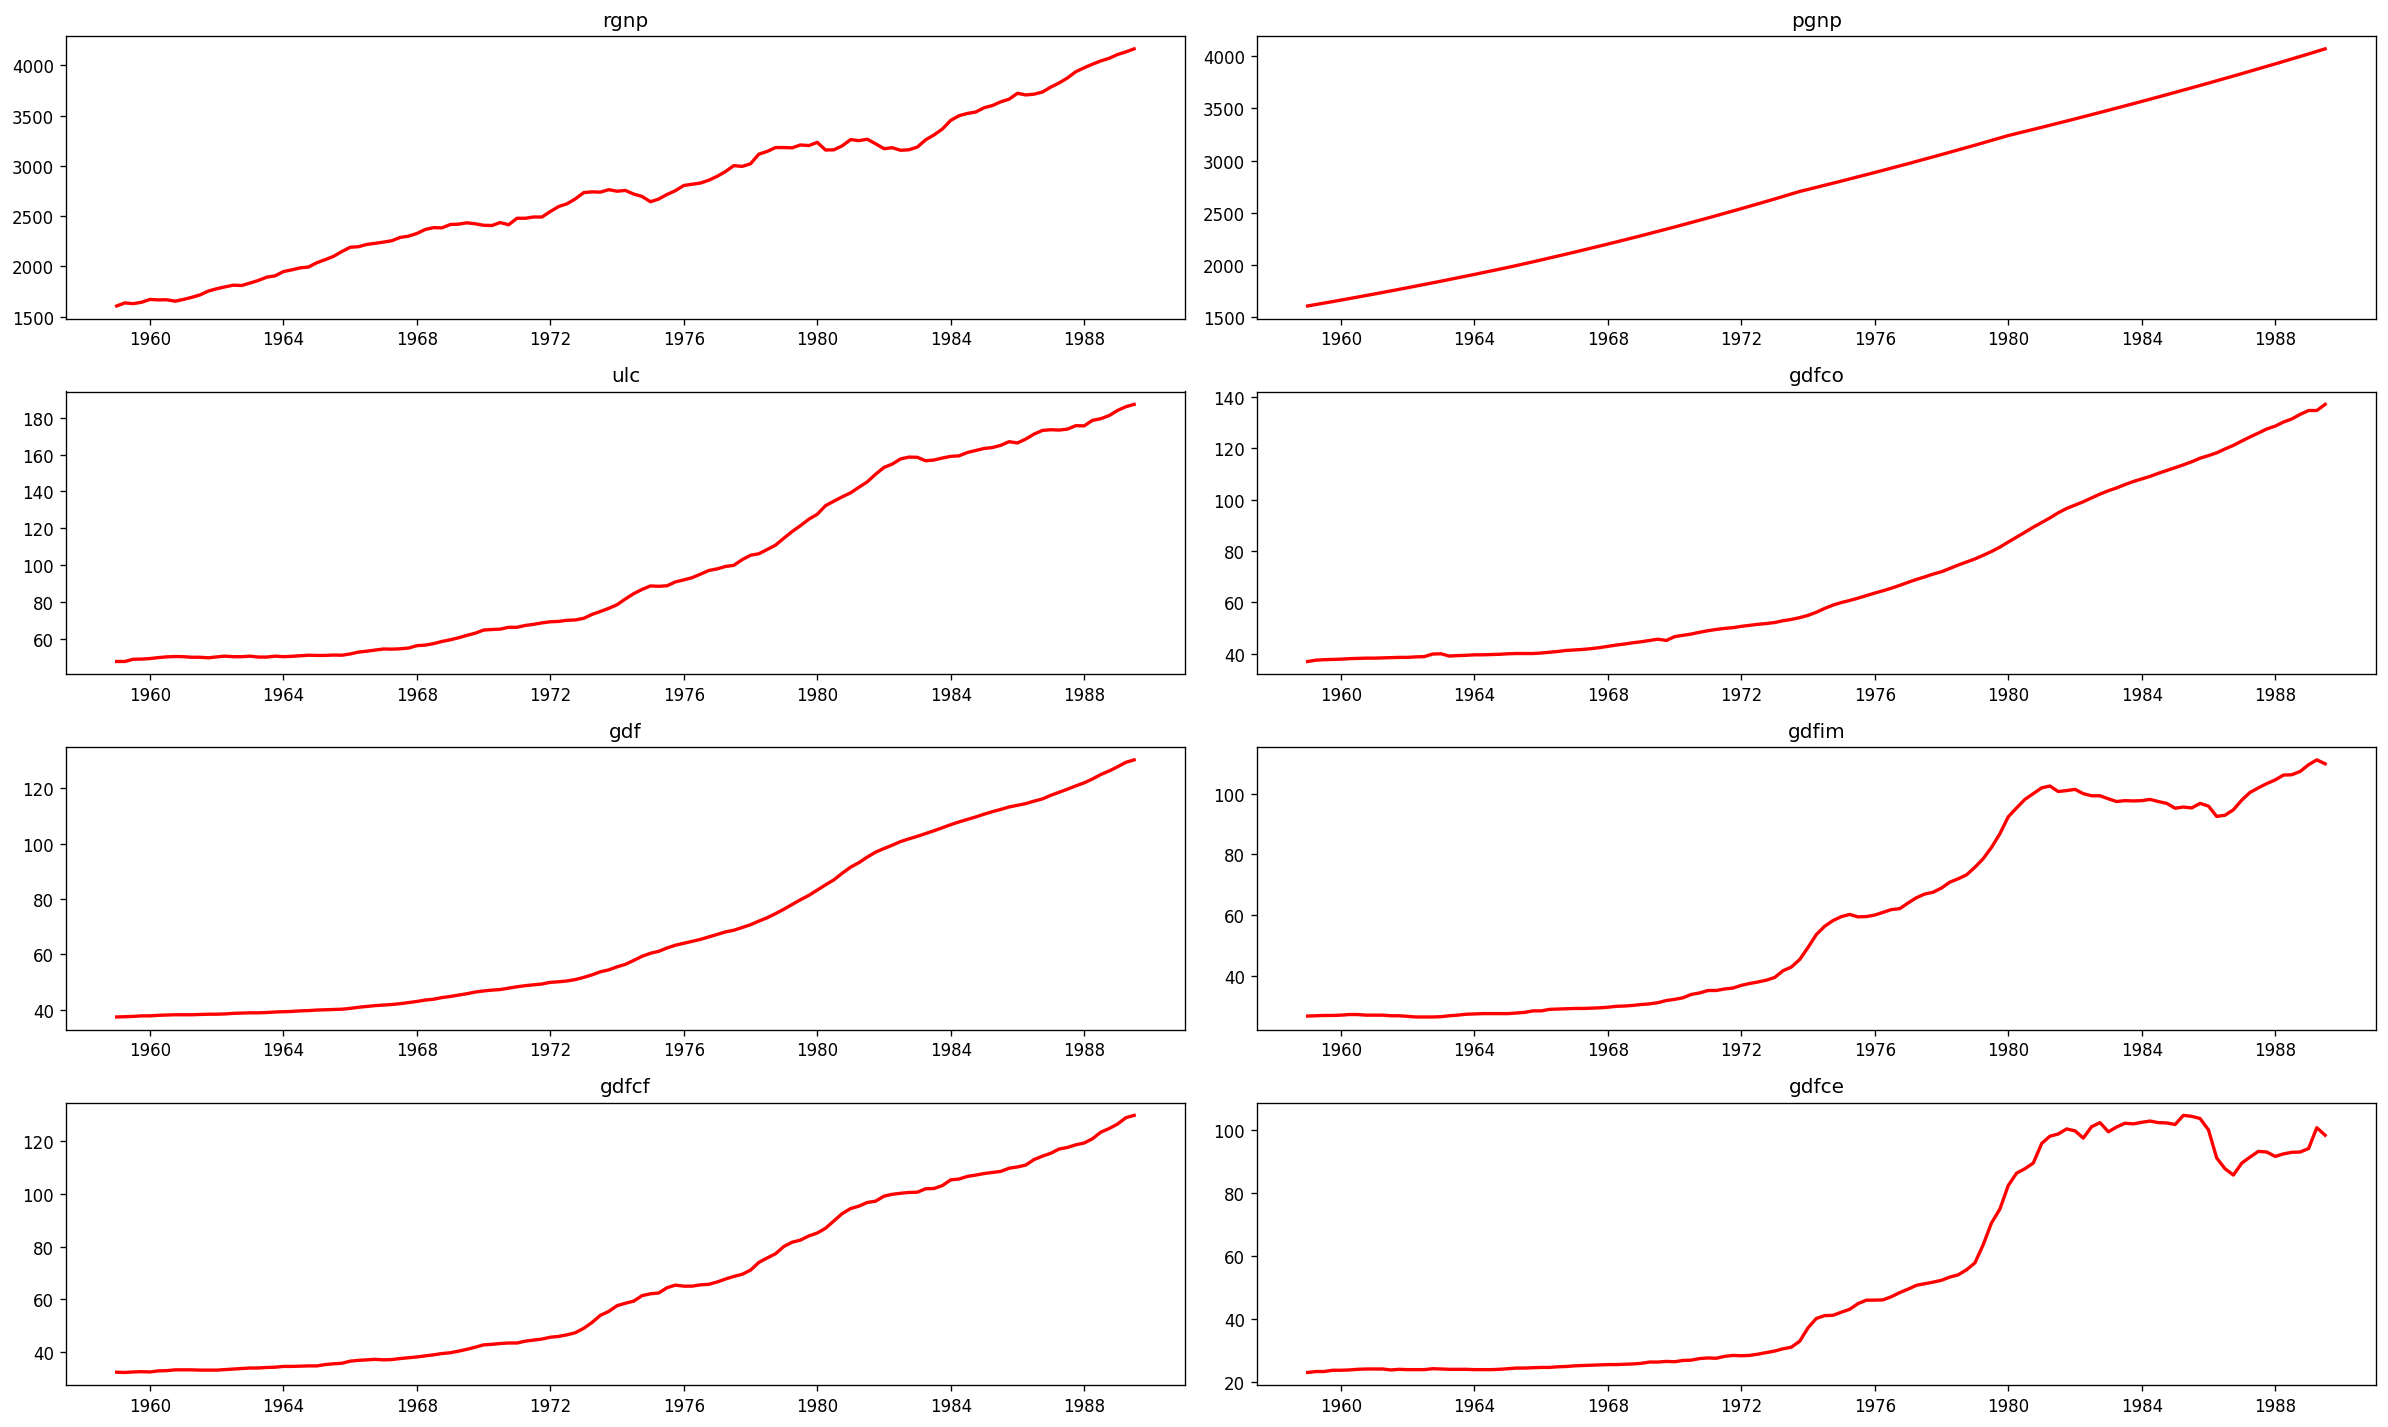

In [19]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows =4 ,ncols =2 ,dpi=120 , figsize=(20,12))  #dpi = dots per inch

for i,ax in enumerate(axes.flatten()):
  data = df[df.columns[i]]
  ax.plot(data, color="red" , lw=2)
  ax.set_title(df.columns[i])

plt.tight_layout()

In [36]:
#Adf (agumented dickey fuller)to chech ststionarity

from statsmodels.tsa.stattools import adfuller

ad_fuller1 = adfuller(df["rgnp"])
print("Adf stats rgnp:", ad_fuller1[0])
print("p-value rgnp:", ad_fuller1[1])


ad_fuller2 = adfuller(df["ulc"])
print("Adf stats ulc :", ad_fuller2[0])
print("p-value ulc:", ad_fuller2[1])

Adf stats rgnp: 0.6418816546694834
p-value rgnp: 0.9886037114305949
Adf stats ulc : 1.3967161828616623
p-value ulc: 0.9970991728829679


In [39]:
# diffrencing the current value with the previous value to get stationarity
# i.e if pvalue<0.05 = stationary or else not ststionary

ad_fuller1 = adfuller(df["rgnp"].diff()[1:])
print("Adf stats rgnp:", ad_fuller1[0])
print("p-value rgnp:", ad_fuller1[1])


ad_fuller2 = adfuller(df["ulc"].diff()[1:])
print("Adf stats ulc :", ad_fuller2[0])
print("p-value ulc:", ad_fuller2[1])

Adf stats rgnp: -5.427594381007333
p-value rgnp: 2.9633019848469254e-06
Adf stats ulc : -3.576080473150911
p-value ulc: 0.006235131830238172


In [41]:
# to check correlation between 2 time series
from statsmodels.tsa.stattools import grangercausalitytests

print("rngp causes ulc")
ganger_1 = grangercausalitytests(df[["ulc" , "rgnp"]] , 4) # 4 =max num of lags

print("rngp causes ulc")
ganger_1 = grangercausalitytests(df[["rgnp" , "ulc"]] , 4)

rngp causes ulc

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.30

In [43]:
dataset = df[["ulc" , "rgnp"]]
dataset.head()

,ulc,rgnp
date,,
1959-01-01,47.5,1606.4
1959-04-01,47.5,1637.0
1959-07-01,48.7,1629.5
1959-10-01,48.8,1643.4
1960-01-01,49.1,1671.6


In [46]:
train = dataset[:-12]
test = dataset[-12:]

print(train.shape , test.shape)

(111, 2) (12, 2)


In [51]:
# model

from statsmodels.tsa.api import VAR

model = VAR(train.diff()[1:])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [52]:
sorted = model.select_order(maxlags=20)
print(sorted.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

In [55]:
from statsmodels.tsa.statespace.varmax import VARMAX

var_model = VARMAX(train , order =(4,0), enforce_stationarity=True) #(4,0) =Ar,ma ; enforce_stationarity=true (makes the data stationary)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11843.003
                          + intercept   AIC                          23728.005
Date:                Fri, 07 Jun 2024   BIC                          23784.905
Time:                        05:11:02   HQIC                         23751.088
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          37.42, 106.04   Jarque-Bera (JB):         24.92, 13.82
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.62, 0.27   Skew:                      0.68, -0.86
Prob(H) (two-sided):            0.15,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
n_forecast =12 #can be increased for further predictions
predict = model_fit.get_prediction(start=len(train) , end=len(train)+n_forecast-1)

predictions = predict.predicted_mean

In [59]:
predictions.columns=["ulc_predicted" , "rgnp_predicted"]
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,166.432281,3570.364858
1987-01-01,242.489918,3755.403518
1987-04-01,51.468960,3555.789034
1987-07-01,266.606055,3859.942047
1987-10-01,148.296727,3482.351817
1988-01-01,170.561434,3767.791685
1988-04-01,154.568340,3633.457421
1988-07-01,209.141621,3731.457521
1988-10-01,143.248383,3567.377757
1989-01-01,196.654726,3769.743489


In [60]:
test_vs_pred = pd.concat([test, predictions],axis=1)

<Axes: >

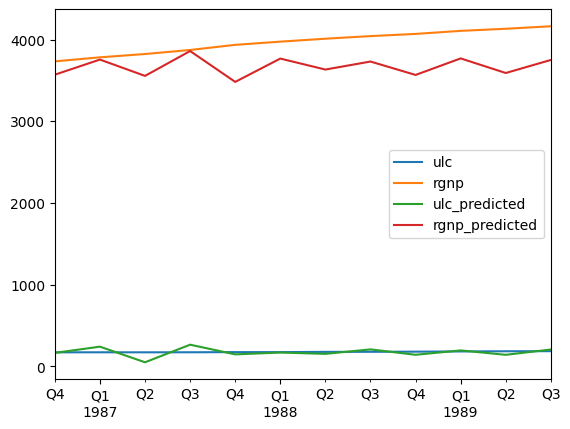

In [61]:
test_vs_pred.plot()

In [63]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

ulc_mean = mean(test["ulc"])
rgnp_mean = mean(test["rgnp"])

rmse_ulc = math.sqrt(mean_squared_error(predictions["ulc_predicted"] , test["ulc"]))
rmse_rgnp = math.sqrt(mean_squared_error(predictions["rgnp_predicted"] , test["rgnp"]))

print("mean of ulc:", ulc_mean , "root mean squared error:" , rmse_ulc)
print("mean of rgnp:", rgnp_mean , "root mean squared error:" , rmse_rgnp)


mean of ulc: 178.56666666666666 root mean squared error: 53.51714916421815
mean of rgnp: 3970.6916666666666 root mean squared error: 343.42482961744247
